In [ ]:
!pip install ultralytics roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="KZ7PbLJrhnR6eelZIYGf")
project = rf.workspace("gkser-ana-model").project("goksermain")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GokSerMain-2 in yolov8:: 100%|██████████| 46726/46726 [00:06<00:00, 7760.15it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")  # pretrained ağırlıklarla başlıyoruz


100%|██████████| 49.7M/49.7M [00:00<00:00, 227MB/s]


In [ ]:
model.train(
    data='/content/GokSerMain-2/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name="teknofest_yolov8m",
    project="runs/train",
    patience=3    # SON 3 EPOCH'TA anlamlı iyileşme olmazsa eğitim durur
)


NameError: name 'model' is not defined

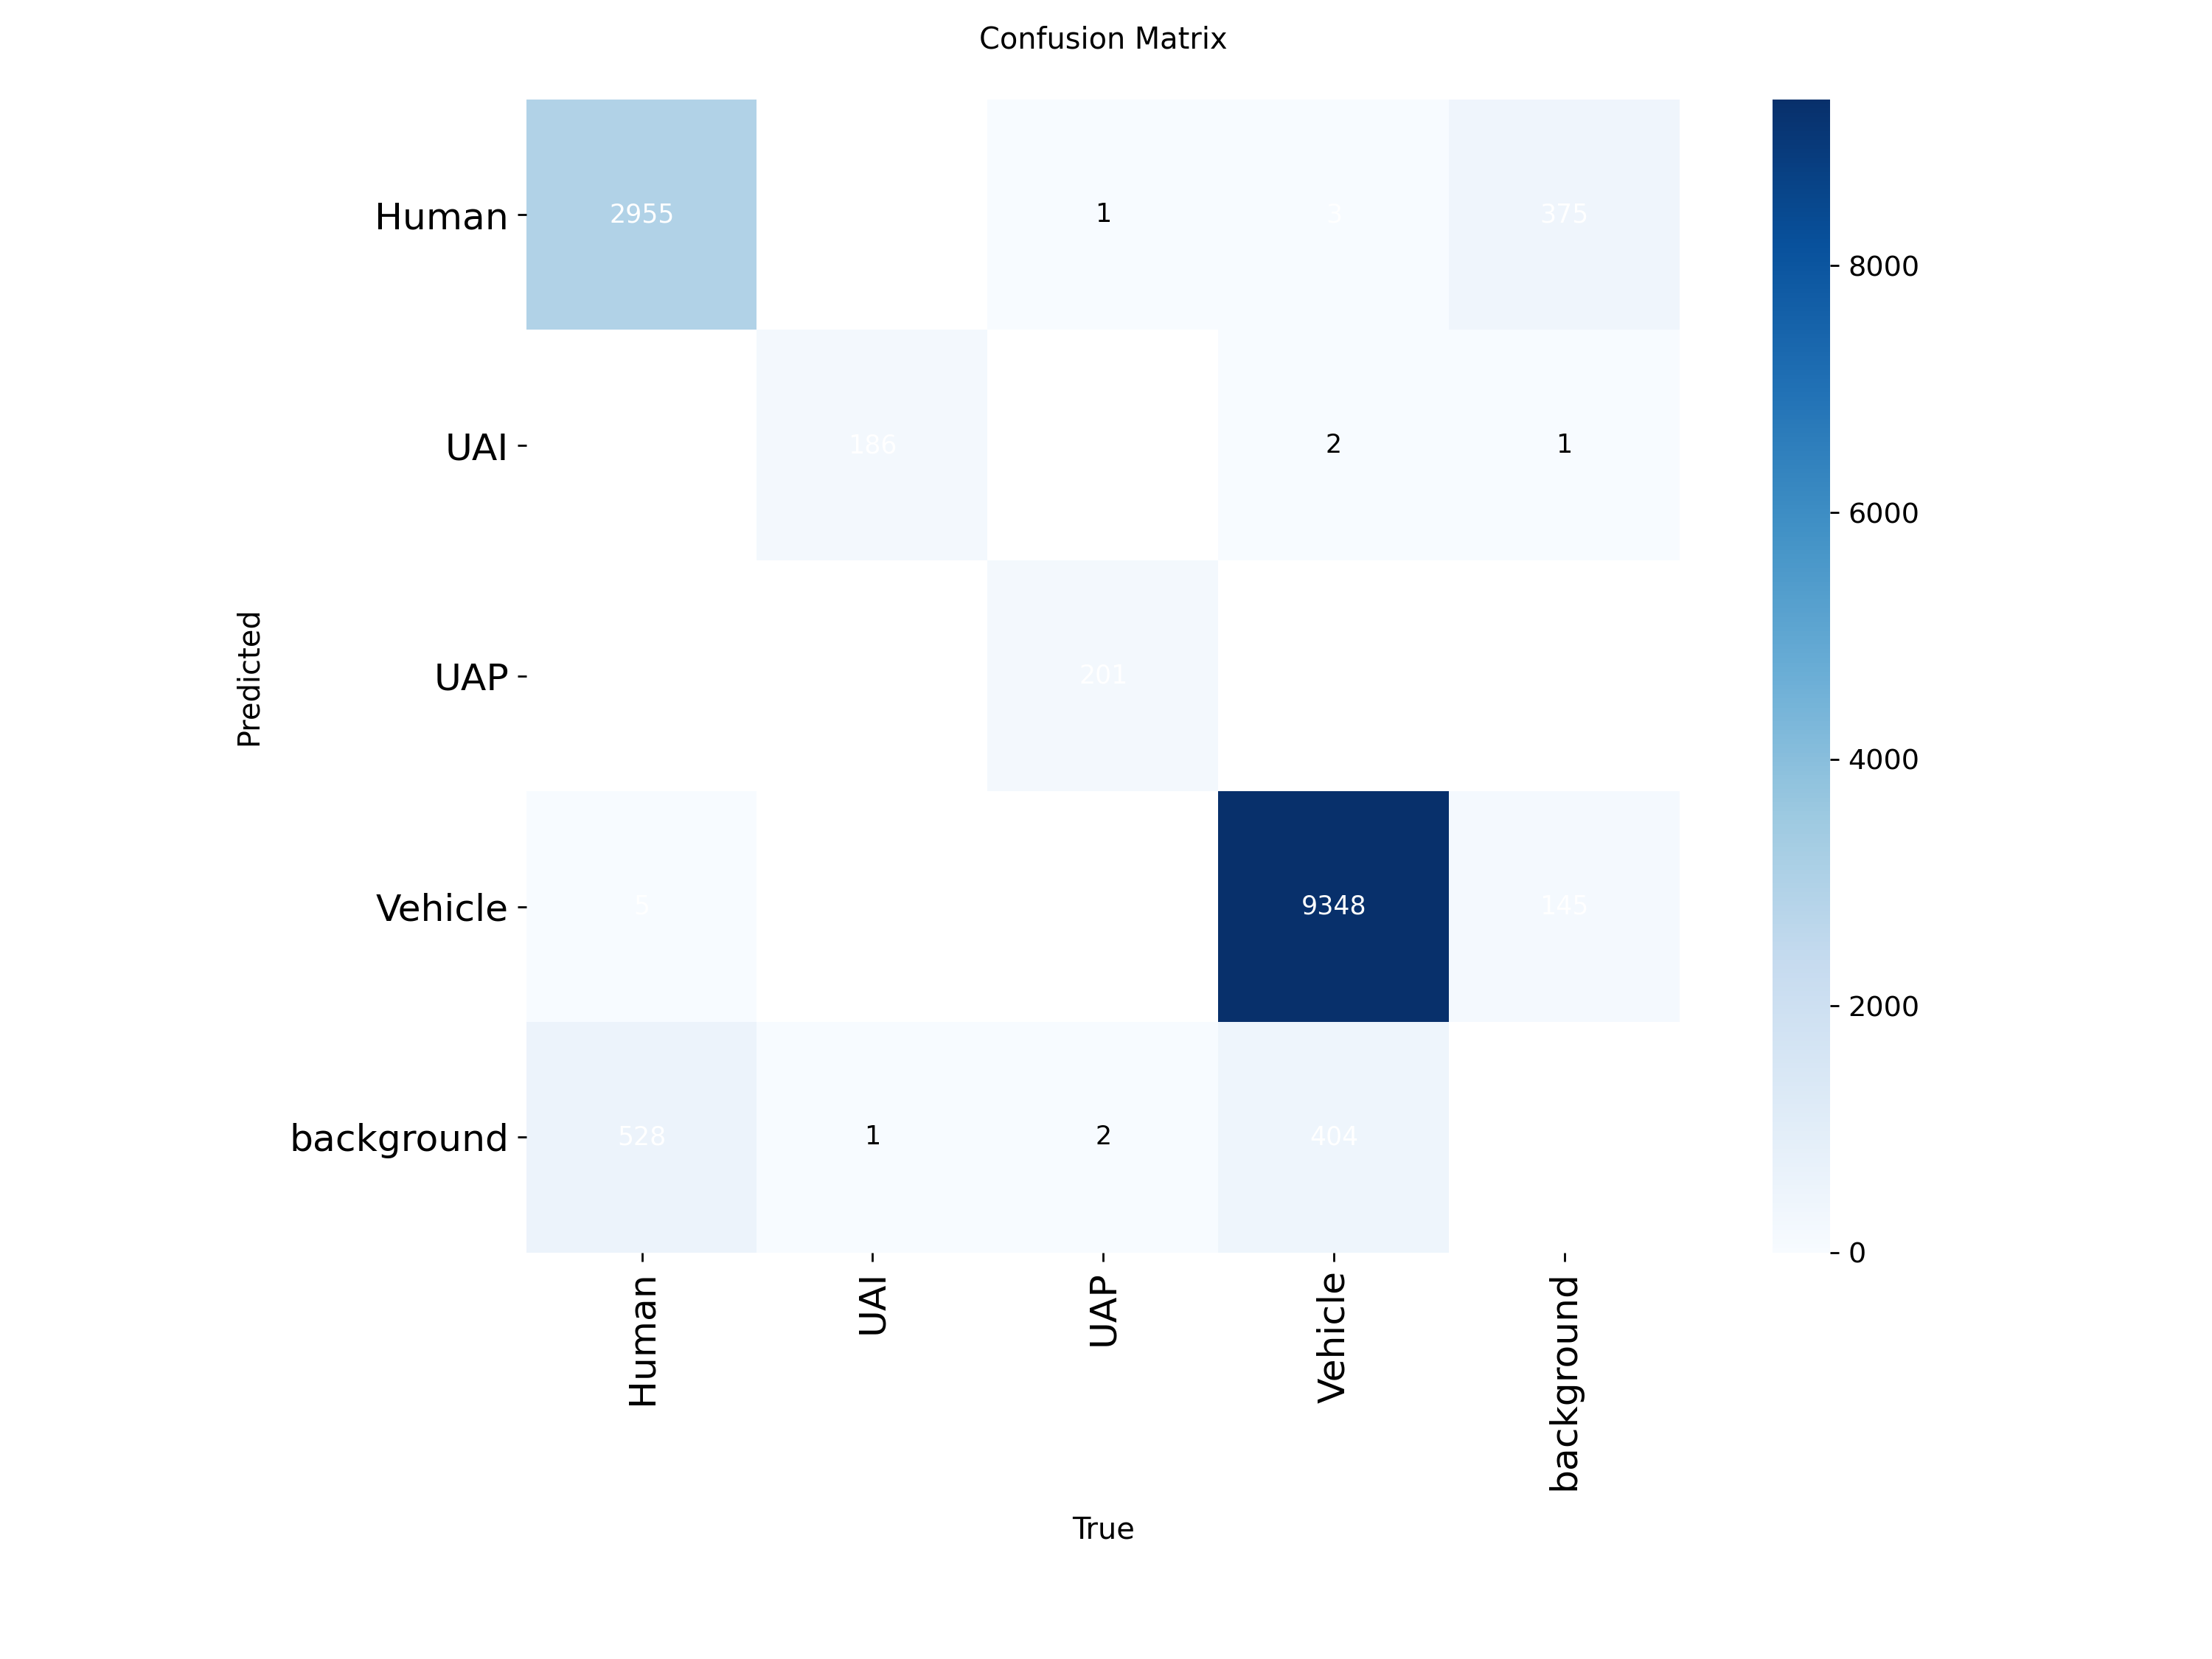

In [ ]:
from IPython.display import Image
Image(filename="/content/runs/train/teknofest_yolov8m2/confusion_matrix.png", width=800)


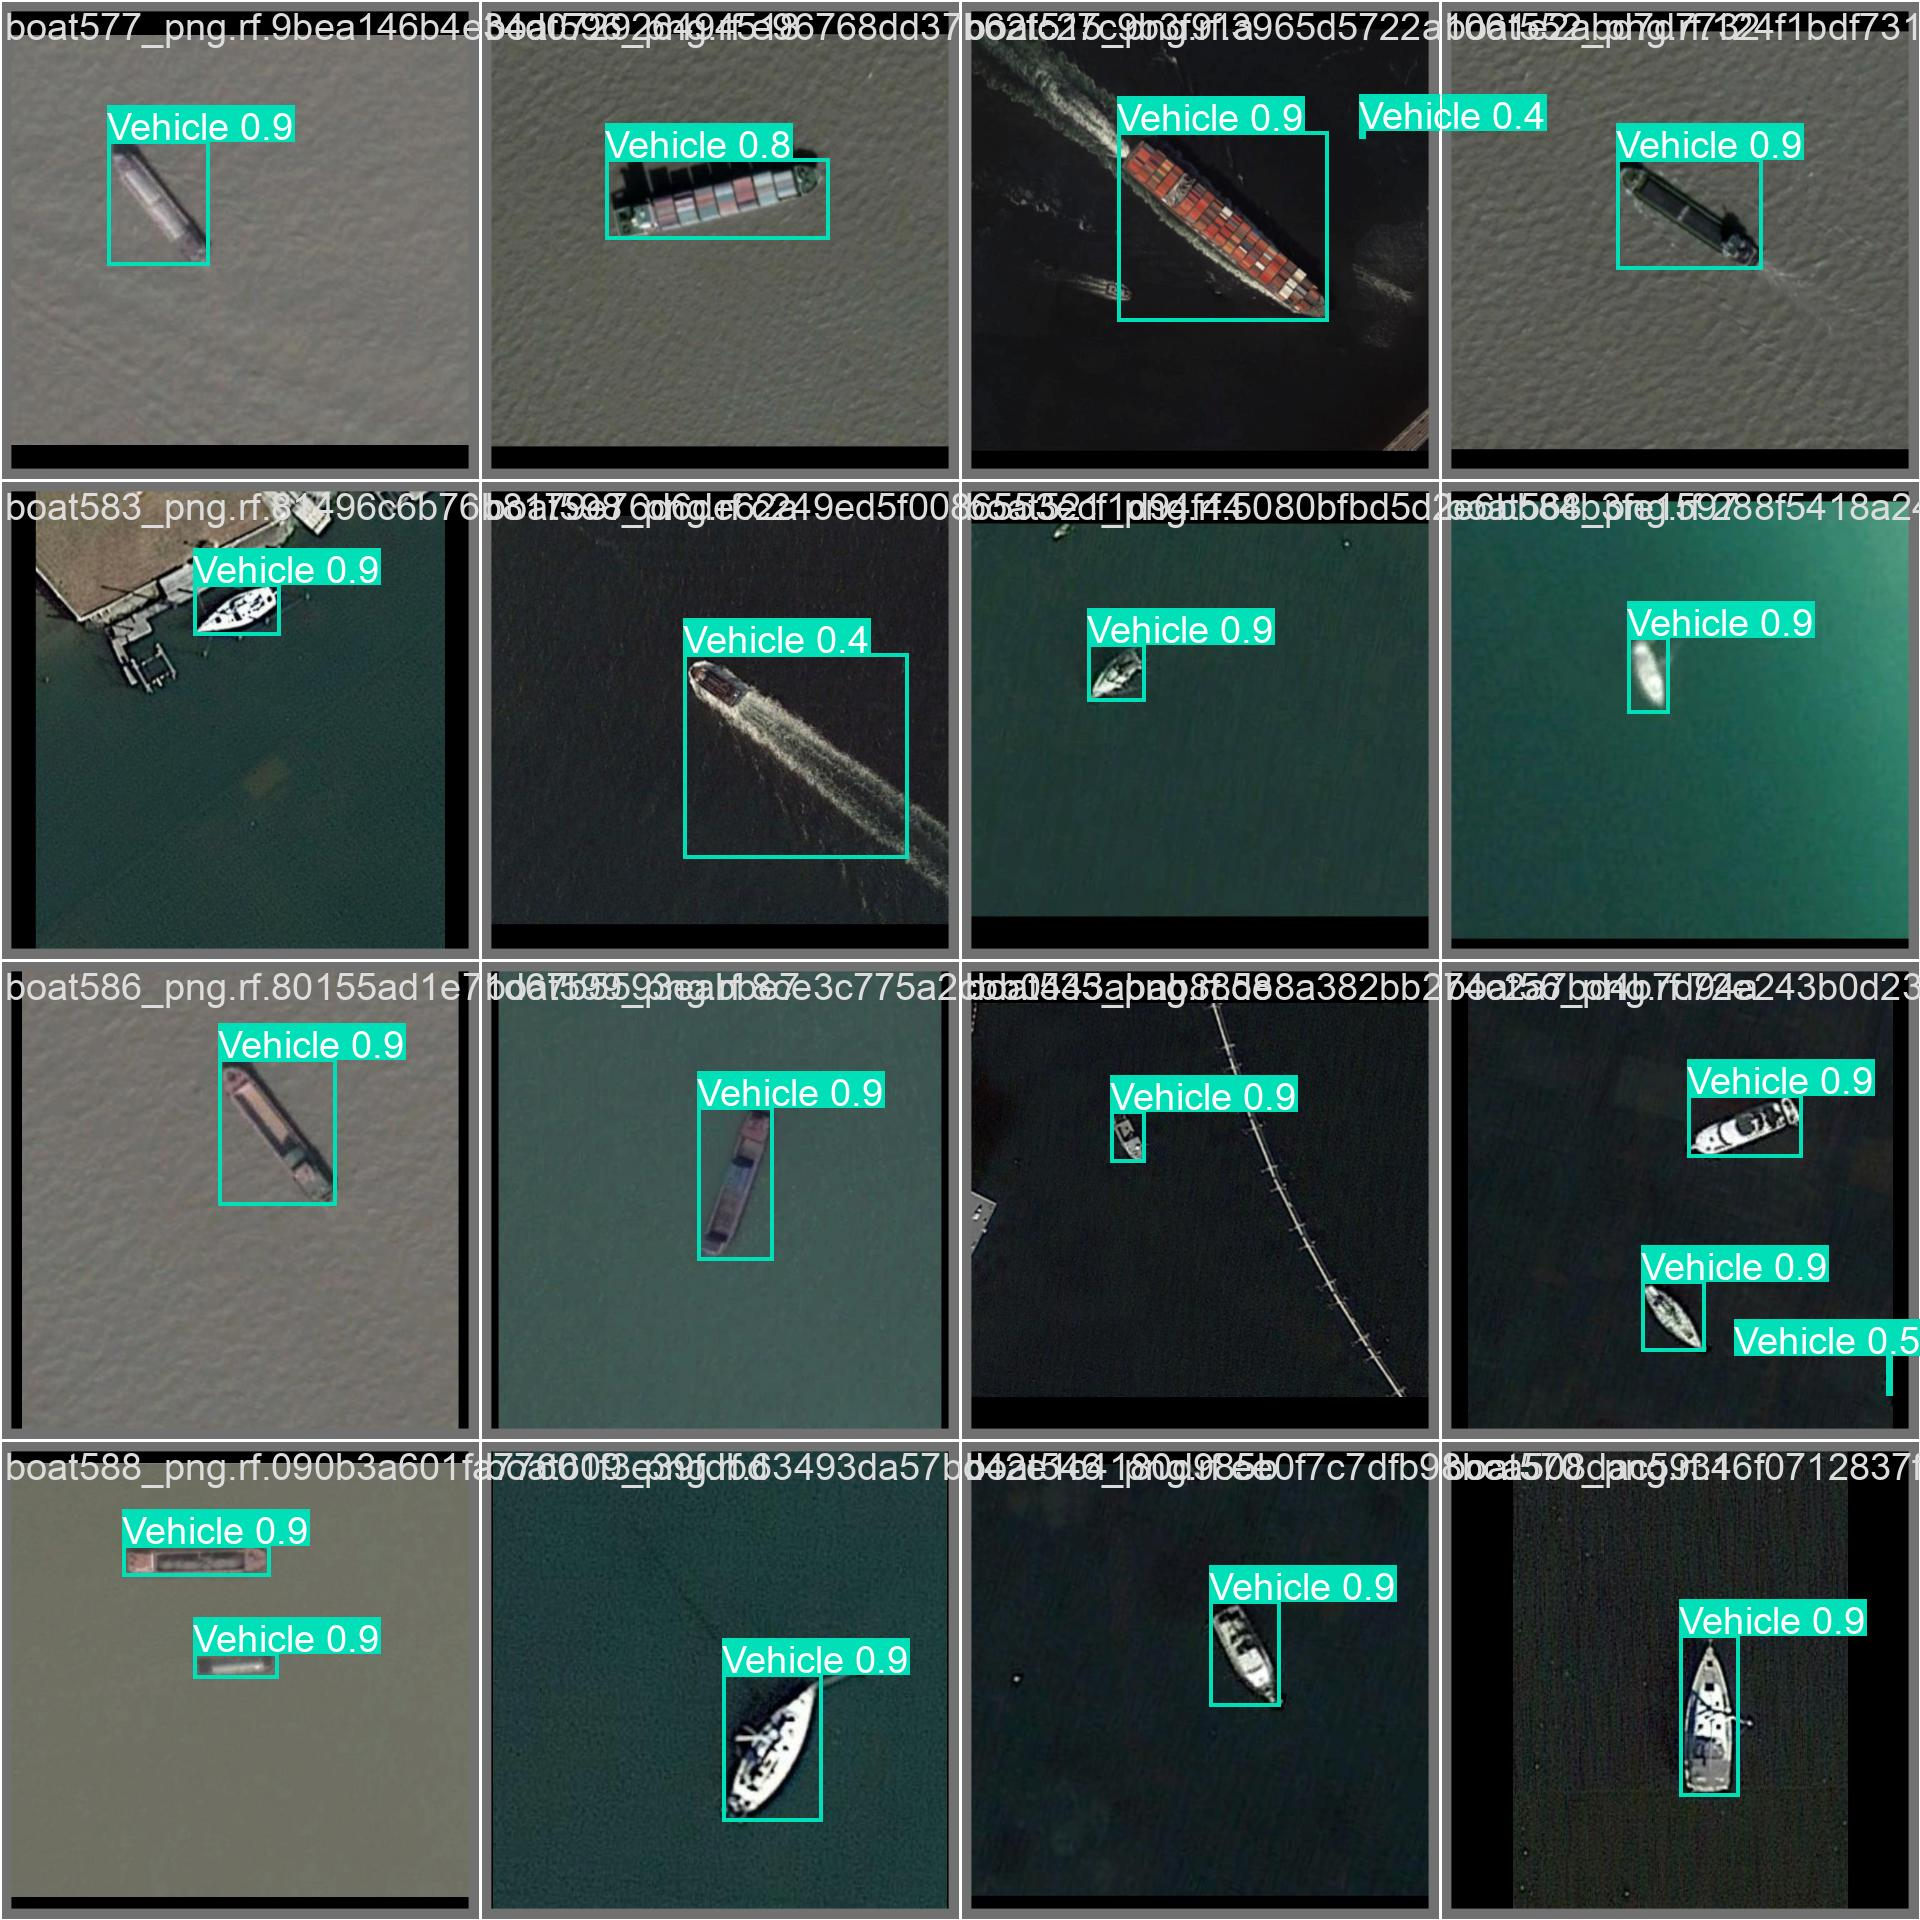

In [ ]:
from IPython.display import Image

Image(filename="/content/runs/train/teknofest_yolov8m2/val_batch0_pred.jpg", width=800)


In [ ]:
!pip install ultralytics==8.0.196`

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path="/content/runs/train/teknofest_yolov8m2/weights/best.pt")

Dependency ultralytics==8.0.196 is required but found version=8.3.147, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y


NotADirectoryError: [Errno 20] Not a directory: '/content/runs/train/teknofest_yolov8m2/weights/best.pt/weights/best.pt'

In [ ]:


deployment = version.deploy(
    model_type="yolov8",
    model_path="/content/runs/train/teknofest_yolov8m2"
)


Dependency ultralytics==8.0.196 is required but found version=8.3.147, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/gkser-ana-model/goksermain/2
Share your model with the world at: https://universe.roboflow.com/gkser-ana-model/goksermain/model/2
